In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
dataset = pd.read_csv('C:/Users/Hoe/Desktop/Learning/Dataset/Spotify_Classification.csv')
#dataset = pd.read_csv('C:/Users/kh.low/Desktop/Python/Dataset/Spotify_Classification.csv',index_col = 0)

In [3]:
#There are 2017 rows and 16 features in this dataset
#will consider to split the data into training set & testing set
print('Dataset:', dataset.shape)

Dataset: (2017, 16)


In [4]:
#Take a look for the first 5 rows & last 5 rows of the dataset
dataset.head(5)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1,Parallel Lines,Junior Boys


In [5]:
dataset.tail(5)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.333,74.976,4,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.131,110.041,4,0.867,0,Candy,Dillon Francis
2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.107,150.082,4,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.133,150.011,4,0.623,0,First Contact,Twin Moons
2016,0.00281,0.446,204520,0.915,0.000039,9,0.2180,-6.221,1,0.141,190.013,4,0.402,0,I Wanna Get Better,Bleachers


In [7]:
#Read the feature names of the dataset
dataset.columns.values

array(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'], dtype=object)

In [7]:
#Categorize the data type into the group

#Class label: target
#Interval: acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness,valence 
#the coffident measure between 0 and 1

#Time: duration_ms
#Numerical: tempo
#Ordinal: key, time_signature
#Binary: mode
#String: song_title & artist

In [8]:
#According to the categorizing above, there are many interval features have the similarity. 
#Example: instrumentalness & speechiness to define that whether the music is vocable.
#Example 2: danceability & energy both feature used to define that the music is energetic or not

#tempo, key and mode are the features as the attribute of music
#acousticness, liveness & loudness are the features affect to the environment of music

#valence used to describe the mood when people listen the music then
# 0.5 < x < 1 indicate the music is more positive
# 0 < x < 0.5 indicate the music is more negative


SpeechinessMusic = dataset[['instrumentalness','speechiness']]
Energetic = dataset[['danceability','energy']]
MusicAttribute = dataset[['tempo','mode','key','time_signature']]
Environment = dataset[['acousticness','liveness','loudness']]


print(SpeechinessMusic.head(2))
print(Energetic.head(2))
print(MusicAttribute.head(2))
print(Environment.head(2))

   instrumentalness  speechiness
0           0.02190       0.4310
1           0.00611       0.0794
   danceability  energy
0         0.833   0.434
1         0.743   0.359
     tempo  mode  key  time_signature
0  150.062     1    2             4.0
1  160.083     1    1             4.0
   acousticness  liveness  loudness
0        0.0102     0.165    -8.795
1        0.1990     0.137   -10.401


In [8]:
#Create a function used to take a look the counts on each feature

def AttributeSeeker(train,column):
    print('Feature:', column)
    print(train[column].value_counts().sort_values(ascending = False)
         )

In [9]:
AttributeSeeker(dataset,'target')

Feature: target
1    1020
0     997
Name: target, dtype: int64


In [10]:
#Take a look on the description of dataset
dataset.describe()

#Assumption:
#1. There is no null values within these 13 features.
#2. According to the SpeechinessMusic, there is only 13% of instrumentalness music in his playist.
#3. According to the speechiness feature, this playist only have 9% of music which is spechiness.
#4. Hence, we will not consider SpeechinessMusic in the modeling

#5. There is a good sign of the features from Energetic dataframe,61% for danceability and 68% for energy.
#6. We will add this group, Energetic into the modeling.

#7. Tempo indicates that this playist consists of most fast tempo music, 120/tempo
#8. The average key of key feature is 5, which corresponding to Concert F major.
#9. Mode feature shows that there is 61% of music which is in major key.
#10. The average of time_signature feature is almost 4, which is the time signature of the playist is in 4.

#11. There is only 18% till 20% of acosusticness & liveness feature. Which mean this playist is recorded & not acoustic.

#----12. I will create a new feature from the duration_ms feature.
#13. There is -33db in minimum value for the loudness feature. 
#14. For the valence feature, there are half and half on positive & negative music.

#1. Classifying: 5,6,7
#2. Correlating: 2,3,7,8,9,10,11,13,14
#3. Converting: 12
#4. Completig: 1
#5. Correcting: 13
#6. Creating: 12
#7. Charting

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [11]:
dataset.describe(include = ['O'])

#Assumption:
#1. It shows that there are only 1956 unique value in song_title
#2. It might contain the repeat song_title
#---3. It might contain the empty song_title
#3. River is the music the user listen most frequent

#1.It shows that there are only 1343 artist in the dataset
#2. It might be contain the repeat artist in the dataset
#---3. It might be contain the empyty artist in the dataset.
#4. I can guess that Drake is the most favor artist in the dataset

,song_title,artist
count,2017,2017
unique,1956,1343
top,River,Drake
freq,3,16


In [12]:
#To check how many null valus in song_title & artist features

#isnull().values.any(): to check whether null values exist or not
#isnull().sum(): Sum of the count of null values

print('song_title:' ,dataset['song_title'].isnull().sum())
print('artist:' ,dataset['artist'].isnull().sum())

#Conclusion: 3rd assumption for both assumption is not valid at all.

song_title: 0
artist: 0


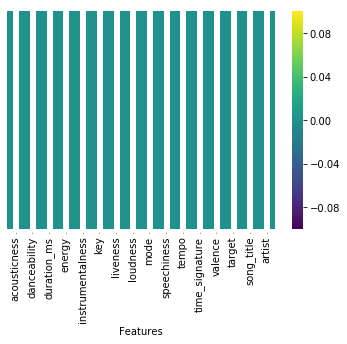

In [13]:
#Heatmap for checking the null values among the features
sns.heatmap(dataset.isnull(), yticklabels = False, cmap = 'viridis', annot = True)
plt.xlabel('Features')
plt.show()

#xticklabels = the labels on x-axis
#yticklabels = the labels on y-axis
#cmap = the color of heat map
#cbar = the bar besides the y-axis 
#annot = the values on the each axis
#fmt = the decimal point of the values



In [14]:
#Check how many of duplicate values in song_title & artist features

def DuplicatedFunction(data,column):
    result = data[column].duplicated().sum()
    return result

print('Duplicate Values:' ,DuplicatedFunction(dataset,'song_title'))
print('Duplicate Values:' ,DuplicatedFunction(dataset,'artist'))

Duplicate Values: 61
Duplicate Values: 674


In [15]:
#Song Title
dataset.loc[dataset.song_title.duplicated(keep = 'first'),:].sort_values(by = 'song_title')

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
1489,0.570000,0.629,250173,0.572,0.000000,5,0.1920,-7.733,0,0.0387,100.015,4,0.3800,0,1-800-273-8255,Logic
320,0.021100,0.697,236456,0.905,0.893000,6,0.1190,-7.787,0,0.0339,119.977,4,0.3110,1,Acamar,Frankey
291,0.045300,0.806,218280,0.696,0.000006,11,0.0785,-5.109,1,0.0502,127.023,4,0.1310,1,Alright,Logic
155,0.023300,0.738,242188,0.849,0.031700,2,0.3090,-6.246,1,0.0822,95.987,4,0.8630,1,Annie,Neon Indian
301,0.045300,0.878,372096,0.430,0.751000,11,0.1010,-8.445,0,0.0658,119.999,4,0.1380,1,Awake,Santé
407,0.960000,0.508,250533,0.325,0.002590,2,0.1880,-11.627,1,0.0370,92.187,4,0.2710,1,Baby,Donnie & Joe Emerson
1816,0.015600,0.627,164840,0.871,0.000005,1,0.2300,-4.403,0,0.0336,129.059,4,0.6770,0,Be My Baby,Bea Miller
1790,0.740000,0.637,233000,0.659,0.000000,3,0.2270,-6.964,1,0.0409,102.029,4,0.5310,0,Best Friend,Jason Chen
1674,0.000175,0.537,127427,0.624,0.000002,11,0.1160,-8.794,1,0.3250,102.315,4,0.4000,0,Calm Down,G-Eazy
27,0.018000,0.646,188333,0.837,0.040300,6,0.3160,-6.615,1,0.1340,100.040,4,0.3200,1,Char,Crystal Castles


In [16]:
#Artist
dataset.loc[dataset.artist.duplicated(),:].sort_values(by = 'artist')

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
1735,0.300000,0.550,266293,0.563,0.000000,2,0.1220,-7.019,1,0.0313,166.004,4,0.4620,0,This I Promise You - Radio Edit,*NSYNC
1738,0.074300,0.754,199787,0.946,0.000391,8,0.4010,-2.149,0,0.0403,112.042,4,0.8650,0,I Want You Back - Radio Edit,*NSYNC
1739,0.041200,0.841,175520,0.866,0.000000,11,0.2120,-6.342,1,0.1180,119.941,4,0.8750,0,Pop - Radio Version,*NSYNC
1740,0.007990,0.685,209560,0.872,0.000000,7,0.3230,-6.939,1,0.0321,110.046,4,0.8060,0,Tearin' up My Heart - Radio Edit,*NSYNC
1910,0.002800,0.686,211000,0.915,0.000007,7,0.2330,-4.447,1,0.0364,110.054,4,0.7840,0,Tearin' up My Heart - Radio Edit,*NSYNC
1736,0.047900,0.647,191280,0.870,0.000000,0,0.0485,-4.702,0,0.0798,165.103,4,0.9060,0,It's Gonna Be Me,*NSYNC
1737,0.440000,0.468,243493,0.535,0.000000,10,0.1010,-8.264,1,0.0436,168.001,4,0.2980,0,God Must Have Spent a Little More Time on You ...,*NSYNC
1383,0.439000,0.892,157001,0.443,0.000000,0,0.0866,-6.181,1,0.0379,107.984,4,0.7290,0,My eyes,10cm
623,0.041500,0.941,207040,0.685,0.000000,10,0.0800,-5.240,1,0.0752,97.524,4,0.6950,1,I'm Different,2 Chainz
677,0.426000,0.872,188347,0.541,0.000789,5,0.1320,-5.911,1,0.1030,95.971,4,0.6530,1,Living,2 Chainz


In [17]:
#Study purpose:  check the duplicate values of numeric variable from the dataset
DatasetOnlyNumeric = dataset.drop(columns = ['song_title','artist','target'])
print(DatasetOnlyNumeric.duplicated().sum())

DatasetOnlyNumeric.loc[DatasetOnlyNumeric.duplicated(keep = 'first'),:]

9


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
267,0.096200,0.654,252095,0.292,0.003100,2,0.106,-12.977,1,0.4740,153.547,4,0.1110
508,0.024600,0.586,374133,0.806,0.000167,1,0.353,-9.542,1,0.0548,110.325,4,0.2070
813,0.114000,0.665,216728,0.513,0.303000,0,0.122,-7.314,1,0.3310,100.344,3,0.0373
894,0.000334,0.907,183581,0.616,0.425000,6,0.110,-7.073,0,0.0577,124.036,4,0.6140
927,0.934000,0.440,254360,0.433,0.811000,2,0.273,-17.453,0,0.0412,79.952,4,0.2170
981,0.036900,0.448,258653,0.733,0.042500,3,0.169,-6.238,1,0.0292,142.008,4,0.4040
1173,0.010200,0.833,204600,0.434,0.021900,2,0.165,-8.795,1,0.4310,150.062,4,0.2860
1215,0.037800,0.810,369627,0.793,0.000002,6,0.072,-9.404,0,0.0403,116.049,4,0.8600
1226,0.119000,0.680,313787,0.489,0.000029,11,0.606,-7.837,0,0.4320,74.040,4,0.2610


In [18]:
dataset.info()

#Float64: 9
#int64: 5
#Object: 2

#I can see that there are many float type in the dataset.
#Therefore, I need to convert the datatype into int

#There are quite complicated about the object features. I will drop the Song_Title & Artist feature


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null int64
valence             2017 non-null float64
target              2017 non-null int64
song_title          2017 non-null object
artist              2017 non-null object
dtypes: float64(9), int64(5), object(2)
memory usage: 252.2+ KB


In [20]:
#7 rules of building the predective model on classification problem

#1. Classifying
#2. Correlating
#3. Converting
#4. Completig
#5. Correcting
#6. Creating
#7. Charting

## Analyze by pivoting features

In [21]:
#Mode
#1. we observe that there is 55% more the music is positive
#2. there is 44% of the music which is negative

In [22]:
print(dataset[['mode','target']].groupby(['mode'],as_index = False).mean().sort_values(by = 'target', ascending = False))

   mode    target
0     0  0.551151
1     1  0.476923


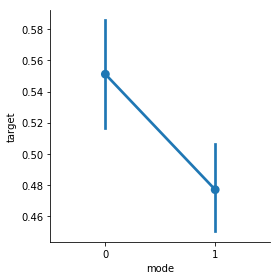

In [23]:
sns.factorplot('mode','target', data = dataset)
plt.show()

In [24]:
#Time_Signature
#1. There is more than half of music is in 4 for time signature

In [25]:
dataset[['time_signature','target']].groupby(['time_signature']).mean().sort_values(by = 'target', ascending = False)

,target
time_signature,
4.0,0.512956
5.0,0.437500
3.0,0.387097
1.0,0.000000


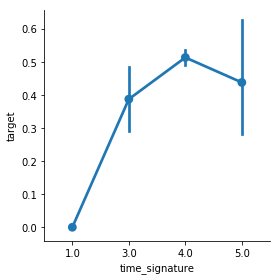

In [26]:
sns.factorplot('time_signature','target', data = dataset)
plt.show()

In [27]:
#key

#pd.crosstab(dataset.key,dataset.target,margins = True)
#sns.countplot(dataset['key'],hue = dataset['target'])  --countplot
#x = dataset['key'].value_counts().plot.bar() -- bar plot
#x.set_title('Number of the key used in the playlist')
#x.set_ylabel('The count of the key')

In [28]:
dataset[['key','target']].groupby('key').count().sort_values(by = 'target', ascending = False)

,target
key,
1,257
0,216
7,212
9,191
11,187
2,184
5,166
6,159
10,141


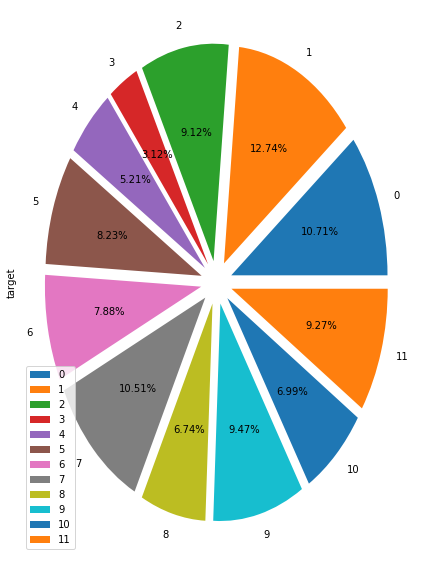

In [29]:
Explode = [.1,.1,.1,.1,.1,.1,.1,.1,.1,.1,.1,.1]

f, ax = plt.subplots(figsize = (7,10))
dataset[['key','target']].groupby('key').count().plot.pie(subplots = True, explode = Explode, autopct = '%.2f%%',ax = ax)
plt.legend(loc = 'lower left') #Legend won't overlap the pie chart
plt.show()

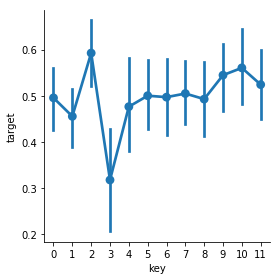

In [30]:
sns.factorplot('key','target', data = dataset)
plt.show()

## Analyze the data by visualization

In [31]:
#1. acousticness
#2. danceability
#3. energy
#4. instrumentalness
#5. liveness
#6. loudness
#7. speechiness
#8. tempo
#9. time_signature
#10. valence

#SpeechinessMusic = dataset[['instrumentalness','speechiness']]
#Energetic = dataset[['danceability','energy']]
#MusicAttribute = dataset[['tempo','mode','key']]
#Environment = dataset[['acousticness','liveness','loudness']]

#valence

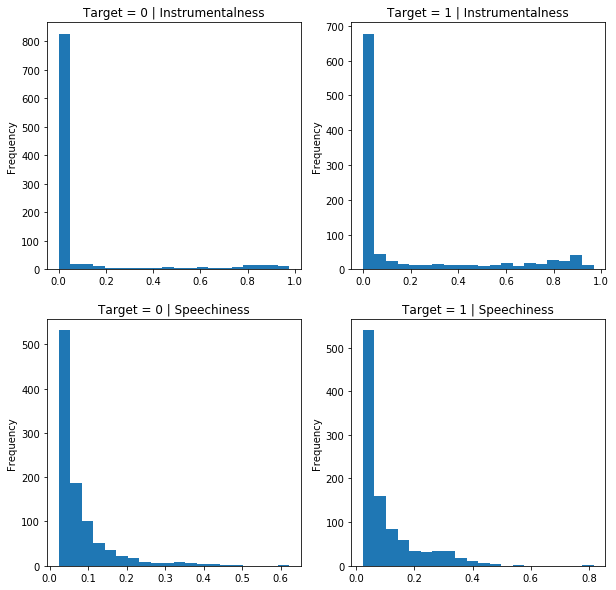

In [32]:
#1. instrumentalness #2. Speechiness
f,ax = plt.subplots(2,2, figsize = (10,10))
dataset[dataset['target'] == 0].instrumentalness.plot.hist(bins = 20, ax = ax[0,0])
#sns.distplot(dataset[dataset['target'] == 0].instrumentalness, ax = ax[0])
ax[0,0].set_title('Target = 0 | Instrumentalness')

dataset[dataset['target'] == 1].instrumentalness.plot.hist(bins = 20, ax = ax[0,1])
ax[0,1].set_title('Target = 1 | Instrumentalness')


dataset[dataset['target'] == 0].speechiness.plot.hist(bins = 20, ax = ax[1,0])
ax[1,0].set_title('Target = 0 | Speechiness')
dataset[dataset['target'] == 1].speechiness.plot.hist(bins = 20, ax = ax[1,1])
ax[1,1].set_title('Target = 1 | Speechiness')
plt.show()

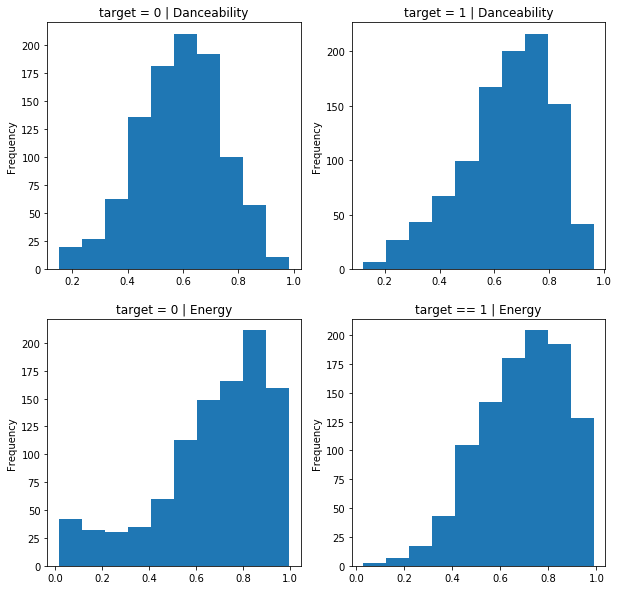

In [33]:
#3. danceability, 4.energy

f, ax = plt.subplots(2,2, figsize = (10,10))
dataset[dataset['target'] == 0].danceability.plot.hist(bins = 10, ax = ax[0,0])
ax[0,0].set_title('target = 0 | Danceability')
dataset[dataset['target'] == 1].danceability.plot.hist(bins = 10, ax = ax[0,1])
ax[0,1].set_title('target = 1 | Danceability')


dataset[dataset['target'] == 0].energy.plot.hist(bins = 10, ax = ax[1,0])
ax[1,0].set_title('target = 0 | Energy')
dataset[dataset['target'] == 1].energy.plot.hist(bins = 10, ax = ax[1,1])
ax[1,1].set_title('target == 1 | Energy')
plt.show()

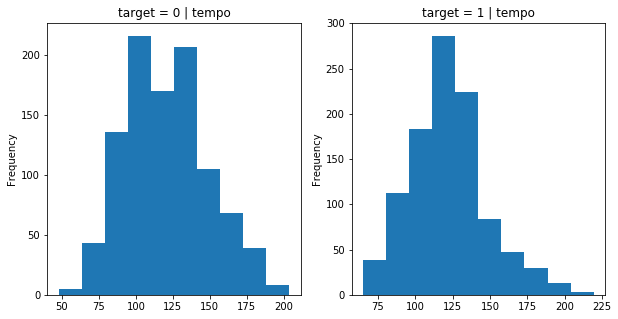

In [34]:
#5. Tempo

f,ax = plt.subplots(1,2, figsize = (10,5))
dataset[dataset['target'] == 0].tempo.plot.hist(bins = 10, ax = ax[0])
ax[0].set_title('target = 0 | tempo')
dataset[dataset['target'] == 1].tempo.plot.hist(bins = 10, ax = ax[1])
ax[1].set_title('target = 1 | tempo')
plt.show()

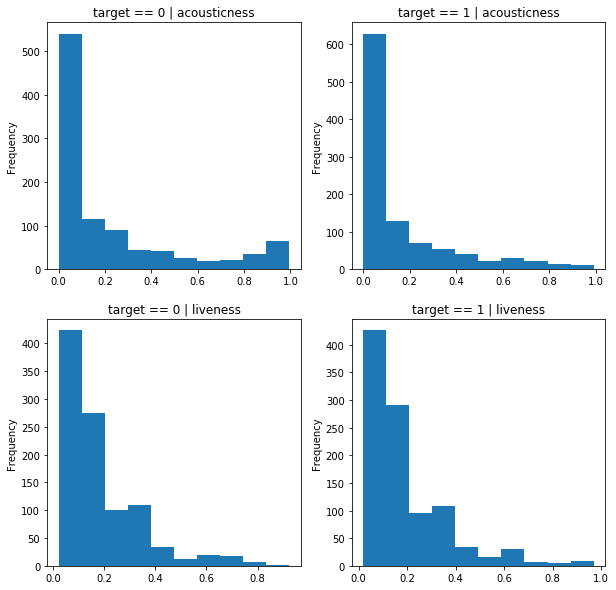

In [35]:
#6. acousticness 7. liveness
f, ax = plt.subplots(2,2, figsize = (10,10))
dataset[dataset['target'] == 0].acousticness.plot.hist(bins = 10, ax = ax[0,0])
ax[0,0].set_title('target == 0 | acousticness')
dataset[dataset['target'] == 1].acousticness.plot.hist(bins = 10, ax = ax[0,1])
ax[0,1].set_title('target == 1 | acousticness')

dataset[dataset['target'] == 0].liveness.plot.hist(bins = 10, ax = ax[1,0])
ax[1,0].set_title('target == 0 | liveness')
dataset[dataset['target'] == 1].liveness.plot.hist(bins = 10, ax = ax[1,1])
ax[1,1].set_title('target == 1 | liveness')

plt.show()

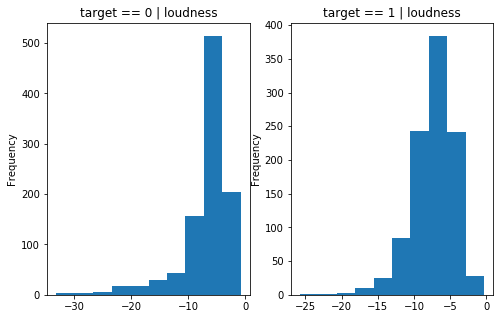

In [36]:
#8. Loudness

#According to the article in the website,https://www.scienceabc.com/pure-sciences/why-negative-decibels-are-a-thing.html
#0db means that this is the loudest measurement before the distortion begins.
#We can see that the favor music loudness level is between -5db and -10db. Which means there are some softer music the user listen.

f, ax = plt.subplots(1,2, figsize = (8,5))
dataset[dataset['target'] == 0].loudness.plot.hist(bins = 10, ax = ax[0])
ax[0].set_title('target == 0 | loudness')
dataset[dataset['target'] == 1].loudness.plot.hist(bins = 10, ax = ax[1])
ax[1].set_title('target == 1 | loudness')
plt.show()

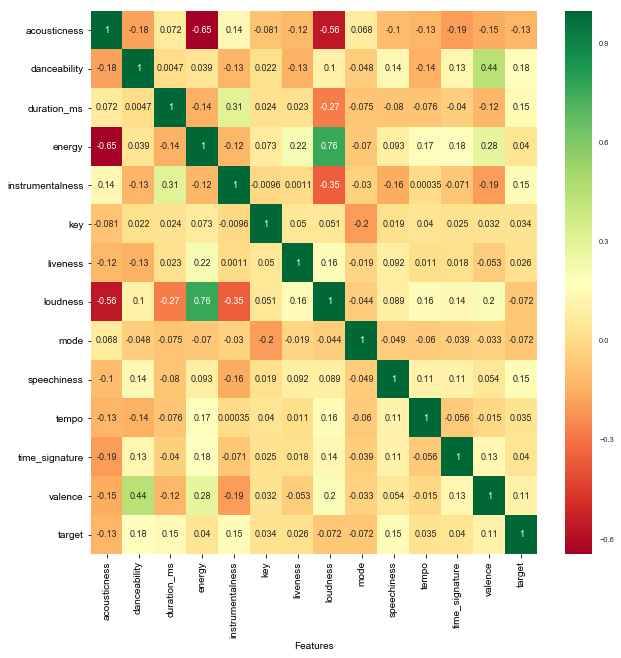

In [37]:
#Heat map the correlation between the features & target

f,ax = plt.subplots(figsize = (10,10)) #Size of the graph
sns.set(font_scale = 0.75) #the font size of the values
sns.heatmap(dataset.corr(), annot = True, cmap = 'RdYlGn',fmt = '.2g', ax = ax)
plt.xlabel('Features')
plt.show()

## 2. Feature Engineering 

In [38]:
#Correcting by drop features

#We decided drop the song_title & artist feature from the dataset.
#As these 2 features doesn't have any contribution for the modeling.
#We might drop the duration_ms feature as my skillset is not able used for the EDA.


In [39]:
#Future: convert the duration_ms into minute. Analyse the correlation between minute & clas labels.


#Converting - convert the duration_ms feature into minute & second

#1. Convert the duration_ms into second, then convert the seconds into minute
#dataset['seconds'] = dataset['duration_ms']/1000
#dataset['minute'] = dataset['seconds']/60

In [40]:
print('The size of dataset before drop the features: ', dataset.shape)
dataset = dataset.drop(['song_title','artist','duration_ms'],axis = 1)
print('The size of dataset after drop the features: ', dataset.shape)

The size of dataset before drop the features:  (2017, 16)
The size of dataset after drop the features:  (2017, 13)


In [41]:
#Converting by binning the feature

#Most of the features are in numeric feature. Hence,would like to convert the numeric feature into ordinal feature.

#Phrase 1: instrumentalness, speechiness
#Phrase 2: danceability, energy
#Phrase 3: acousticness,liveness, loudness

#Phrase 4: Tempo,Mode,Key    


In [42]:
#Convert the series object into numeric 
#Round off the decimal points to 4 digits
#dataset['instrumentalness'] = pd.to_numeric(dataset['instrumentalness'],downcast='float')
#dataset['instrumentalness'] = round(dataset['instrumentalness'],2)

In [43]:
#1. instrumentalness

#Cut version
#Instrumentalness & Speechiness, create the feature about the range of instrumentalness

dataset['InstrumentalnessBand'] = pd.cut(dataset['instrumentalness'],4)
dataset[['InstrumentalnessBand','target']].groupby('InstrumentalnessBand',as_index = False).mean().sort_values(by = 'InstrumentalnessBand', ascending = True)

#Qcut version
#Instrumentalness & Speechiness, create the feature about the range of instrumentalness

#dataset['InstrumentalnessBand'] = pd.qcut(dataset['instrumentalness'],q = 10, duplicates='drop')
#dataset[['InstrumentalnessBand','target']].groupby('InstrumentalnessBand',as_index = False).mean().sort_values(by = 'InstrumentalnessBand', ascending = True)

,InstrumentalnessBand,target
0,"(-0.000976, 0.244]",0.467635
1,"(0.244, 0.488]",0.724138
2,"(0.488, 0.732]",0.702128
3,"(0.732, 0.976]",0.644809


In [44]:
#Create the new ordinal feature, instrumentalness2 to define the range of the instrumentalness

dataset['instrumentalness2'] = 0 #create the initial for the new variable
dataset.loc[ dataset['instrumentalness'] <= 0.245, 'instrumentalness2'] = 0
dataset.loc[(dataset['instrumentalness'] > 0.245) & (dataset['instrumentalness'] <= 0.49) , 'instrumentalness2'] = 1
dataset.loc[(dataset['instrumentalness'] > 0.49) & (dataset['instrumentalness'] <= 0.7345) , 'instrumentalness2'] = 2
dataset.loc[dataset['instrumentalness'] > 0.7345  , 'instrumentalness2'] = 3


In [45]:
#2. speechiness

dataset['SpeechinessBand'] = pd.cut(dataset['speechiness'],4)
dataset[['SpeechinessBand','target']].groupby('SpeechinessBand',as_index = False).mean().sort_values(by = 'SpeechinessBand', ascending = True)

,SpeechinessBand,target
0,"(0.0223, 0.221]",0.481298
1,"(0.221, 0.42]",0.740113
2,"(0.42, 0.618]",0.650000
3,"(0.618, 0.816]",0.500000


In [46]:
dataset['speechiness2'] = 0
dataset.loc[dataset['speechiness'] <= 0.221, 'speechiness2'] = 0
dataset.loc[(dataset['speechiness'] > 0.221) & (dataset['speechiness'] <= 0.42), 'speechiness2'] = 1
dataset.loc[(dataset['speechiness'] > 0.42) & (dataset['speechiness'] <= 0.618), 'speechiness2'] = 2
dataset.loc[dataset['speechiness'] > 0.618, 'speechiness2'] = 3

In [47]:
#3. danceability, #4. energy

dataset['DanceabilityBand'] = pd.cut(dataset['danceability'], 4)
dataset[['DanceabilityBand','target']].groupby('DanceabilityBand',as_index = False).mean().sort_values(by = 'DanceabilityBand', ascending = True)

,DanceabilityBand,target
0,"(0.121, 0.338]",0.469565
1,"(0.338, 0.553]",0.377820
2,"(0.553, 0.769]",0.506442
3,"(0.769, 0.984]",0.703601


In [48]:
dataset['danceability2'] = 0
dataset.loc[dataset['danceability'] <= 0.338, 'danceability2'] = 0
dataset.loc[(dataset['danceability'] > 0.338) & (dataset['danceability'] <= 0.553),'danceability2'] = 1
dataset.loc[(dataset['danceability']> 0.553) & (dataset['danceability'] <= 0.769),'danceability2'] = 2
dataset.loc[dataset['danceability'] > 0.769,'danceability2'] = 3

In [49]:
#4. energy

dataset['EnergyBand'] = pd.cut(dataset['energy'],4)
dataset[['EnergyBand','target']].groupby('EnergyBand',as_index = False).mean().sort_values(by = 'EnergyBand', ascending = True)

,EnergyBand,target
0,"(0.0138, 0.261]",0.152381
1,"(0.261, 0.506]",0.583333
2,"(0.506, 0.752]",0.555270
3,"(0.752, 0.998]",0.480460


In [50]:
dataset['energy2'] = 0
dataset.loc[dataset['energy']<= 0.261, 'energy2'] = 0
dataset.loc[(dataset['energy'] > 0.261) & (dataset['energy'] <= 0.506), 'energy2'] = 1
dataset.loc[(dataset['energy'] > 0.506) & (dataset['energy'] <= 0.752), 'energy2'] = 2
dataset.loc[dataset['energy'] > 0.752, 'energy2'] = 3

In [51]:
#5. acousticness
dataset['AcousticnessBand'] = pd.cut(dataset['acousticness'], 4)
dataset[['AcousticnessBand','target']].groupby('AcousticnessBand', as_index = False).mean().sort_values(by = 'AcousticnessBand', ascending = True)

,AcousticnessBand,target
0,"(-0.000992, 0.249]",0.531187
1,"(0.249, 0.498]",0.496154
2,"(0.498, 0.746]",0.546218
3,"(0.746, 0.995]",0.231293


In [52]:
dataset['acousticness2'] = 0
dataset.loc[dataset['acousticness'] <= 0.249, 'acousticness'] = 0
dataset.loc[(dataset['acousticness'] > 0.249) & (dataset['acousticness'] <= 0.498), 'acousticness2'] = 1
dataset.loc[(dataset['acousticness'] > 0.498) & (dataset['acousticness']<= 0.746), 'acousticness2'] = 2
dataset.loc[dataset['acousticness'] > 0.746, 'acousticness2'] = 3

In [53]:
#6. liveness

dataset['LivenessBand'] = pd.cut(dataset['liveness'],4)
dataset[['LivenessBand','target']].groupby('LivenessBand',as_index = False).mean().sort_values(by = 'LivenessBand', ascending = True)

,LivenessBand,target
0,"(0.0178, 0.256]",0.499348
1,"(0.256, 0.494]",0.517808
2,"(0.494, 0.731]",0.510870
3,"(0.731, 0.969]",0.692308


In [54]:
dataset['liveness2'] = 0
dataset.loc[dataset['liveness'] <= 0.256, 'liveness2'] = 0
dataset.loc[(dataset['liveness'] > 0.256) & (dataset['liveness'] <= 0.494), 'liveness2'] = 1
dataset.loc[(dataset['liveness'] > 0.494) & (dataset['liveness']<= 0.731), 'liveness2'] = 2
dataset.loc[dataset['liveness'] > 0.731, 'liveness2'] = 3

In [55]:
#7. loudness
dataset['LoudnessBand'] = pd.cut(dataset['loudness'], 4)
dataset[['LoudnessBand','target']].groupby('LoudnessBand').mean()

,target
LoudnessBand,
"(-33.13, -24.9]",0.090909
"(-24.9, -16.702]",0.220000
"(-16.702, -8.504]",0.673660
"(-8.504, -0.307]",0.470858


In [56]:
dataset['loudness2'] = 0
dataset.loc[dataset['loudness'] <= -24.9, 'loudness2'] = 0
dataset.loc[(dataset['loudness'] > -24.9) & (dataset['loudness'] <= -16.702), 'loudness2'] = 1
dataset.loc[(dataset['loudness'] > -16.702) & (dataset['loudness'] <= -8.504), 'loudness2'] = 2
dataset.loc[dataset['loudness'] > -8.504, 'loudness2'] = 3

In [57]:
#8. tempo

dataset['TempoBand'] = pd.cut(dataset['tempo'],4)
dataset[['TempoBand','target']].groupby('TempoBand',as_index = False).mean().sort_values(by = 'TempoBand', ascending = True)

,TempoBand,target
0,"(47.688, 90.727]",0.413043
1,"(90.727, 133.595]",0.529218
2,"(133.595, 176.463]",0.485323
3,"(176.463, 219.331]",0.557377


In [58]:
dataset['tempo2'] = 0
dataset.loc[dataset['tempo'] <= 90.727, 'tempo2'] = 0
dataset.loc[(dataset['tempo'] > 90.727) & (dataset['tempo'] <= 133.595), 'tempo2'] = 1
dataset.loc[(dataset['tempo'] > 133.595) & (dataset['tempo'] <= 176.463), 'tempo2'] = 2
dataset.loc[ dataset['tempo'] > 176.463, 'tempo2'] = 3

In [59]:
#9. valence
dataset['valenceband'] = pd.cut(dataset['valence'], 4)
dataset[['valenceband','target']].groupby('valenceband').mean().sort_values(by = 'valenceband')

,target
valenceband,
"(0.0338, 0.274]",0.423246
"(0.274, 0.513]",0.490196
"(0.513, 0.753]",0.539405
"(0.753, 0.992]",0.579365


In [60]:
dataset['valence2'] = 0
dataset.loc[dataset['valence'] <= 0.274, 'valence2'] = 0
dataset.loc[(dataset['valence'] > 0.274) & (dataset['valence'] <= 0.513), 'valence2'] = 1
dataset.loc[(dataset['valence']> 0.513) & (dataset['valence'] <= 0.753), 'valence2'] = 2
dataset.loc[dataset['valence'] > 0.753, 'valence2'] = 3

In [61]:
dataset.columns

Index(['acousticness', 'danceability', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'time_signature', 'valence', 'target', 'InstrumentalnessBand',
       'instrumentalness2', 'SpeechinessBand', 'speechiness2',
       'DanceabilityBand', 'danceability2', 'EnergyBand', 'energy2',
       'AcousticnessBand', 'acousticness2', 'LivenessBand', 'liveness2',
       'LoudnessBand', 'loudness2', 'TempoBand', 'tempo2', 'valenceband',
       'valence2'],
      dtype='object')

### Drop the unnecessary features like (range feature, those features without binning)
#### Rename the features

In [62]:
#Drop the range feature
dataset = dataset.drop(['InstrumentalnessBand','SpeechinessBand','DanceabilityBand','EnergyBand',
                        'AcousticnessBand','LivenessBand','LoudnessBand','TempoBand','valenceband'], axis = 1)
dataset.columns

Index(['acousticness', 'danceability', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'time_signature', 'valence', 'target', 'instrumentalness2',
       'speechiness2', 'danceability2', 'energy2', 'acousticness2',
       'liveness2', 'loudness2', 'tempo2', 'valence2'],
      dtype='object')

In [63]:
#Drop all the numerical features without process through binning method
dataset = dataset.drop(['acousticness','danceability','energy','instrumentalness',
                        'liveness','loudness','speechiness','tempo','valence'], axis = 1)
dataset.columns

Index(['key', 'mode', 'time_signature', 'target', 'instrumentalness2',
       'speechiness2', 'danceability2', 'energy2', 'acousticness2',
       'liveness2', 'loudness2', 'tempo2', 'valence2'],
      dtype='object')

In [64]:
#Rename the binning features
dataset = dataset.rename(columns = {'instrumentalness2': 'instrumentalness', 'speechiness2': 'speechiness', 
                                   'danceability2': 'danceability','energy2': 'energy', 'acousticness2': 'acousticness',
                                   'liveness2': 'liveness', 'loudness2': 'loudness','tempo2': 'tempo', 'valence2': 'valence' })

In [65]:
#Convert the time_signature feature from numerical type to int type

dataset['time_signature'] = dataset['time_signature'].astype(int)
dataset.head()

,key,mode,time_signature,target,instrumentalness,speechiness,danceability,energy,acousticness,liveness,loudness,tempo,valence
0,2,1,4,1,0,2,3,1,0,0,2,2,1
1,1,1,4,1,0,0,2,1,0,0,2,2,2
2,2,1,4,1,0,1,3,1,0,0,3,0,0
3,5,1,4,1,2,0,1,1,2,0,2,0,0
4,5,0,4,1,2,0,2,2,0,1,2,2,3


In [66]:
#1.2.2020
# Rescale Key, time_signature *optional

#from sklearn.preprocessing import minmax_scale
#columns = ["column one", "column two"]
#data[columns] = minmax_scale(data[columns])
dataset.describe()

#Drop the features which doesn't have good result in EDA. instrumentalness, speechiness, acousticness, liveness
dataset = dataset.drop(['instrumentalness','speechiness','acousticness','liveness'],axis = 1)
dataset.head()
print('The size of the dataset after drop the features:', dataset.shape)

The size of the dataset after drop the features: (2017, 9)


In [67]:
dataset.head()

,key,mode,time_signature,target,danceability,energy,loudness,tempo,valence
0,2,1,4,1,3,1,2,2,1
1,1,1,4,1,2,1,2,2,2
2,2,1,4,1,3,1,3,0,0
3,5,1,4,1,1,1,2,0,0
4,5,0,4,1,2,2,2,2,3


In [68]:
#Dummy Coding for all the features except the target & mode
#1. Apply the One Hot Encoder for the features

dummies_columns = ['key','time_signature','danceability','energy','loudness','tempo','valence','mode']

df_key = pd.get_dummies(dataset['key'])
df_time_signature = pd.get_dummies(dataset['time_signature'])
df_danceability = pd.get_dummies(dataset['danceability'])
df_energy = pd.get_dummies(dataset['energy'])
df_loudness = pd.get_dummies(dataset['loudness'])
df_tempo = pd.get_dummies(dataset['tempo'])
df_valence = pd.get_dummies(dataset['valence'])
df_mode = pd.get_dummies(dataset['mode'])

dummies = pd.concat([df_key,df_time_signature,df_danceability,df_energy,df_loudness,df_tempo,df_valence,df_mode], axis = 1)
dataset = pd.concat([dataset,dummies],axis = 1)
print('The size of the dataset after create the dummy variable:',dataset.shape)

The size of the dataset after create the dummy variable: (2017, 47)


In [69]:
#Study Purpose: Create the dummy variable by OneHotEncoder

#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import make_column_transformer

#column_trans = make_column_transformer((OneHotEncoder(),['key','time_signature','danceability','energy','loudness','tempo','valence']),
                                      #remainder = 'passthrough')

In [70]:
#Replaces the features by dummy variables

dataset = dataset.drop(['key','time_signature','danceability','energy','loudness','tempo','valence','mode'],axis = 1)
print('The size of the dataset after replace the features by dummy variable:', dataset.shape)

The size of the dataset after replace the features by dummy variable: (2017, 39)


### Future plan:  
1. Deal with the dummy variable trap for that 7 ordinal features
2. Loudness variable with negative value caused of the performance of model
3. Mode is the feature have the poor correlation with the target
4. Feature Scaling

# Modeling, predict & evaluation

1. Select the proper machine learning algorithm for the modeling
   - Logistic Regression
   - Naive Bayes
   - Decision tree
   - KNN
2. create X_train & Y_train from the dataset
3. Apply the train_test_split function to split the dataset into training dataset & test dataset

4. Apply the Machine Learning Algorithm into the model
5. Apply k-fold cross validation to test the performance of the model
6. Create the confusion matrix table to see the result

In [71]:
#1. Select the proper machine learning algorithm for the modeling
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #measure the accuracy of model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [72]:
#2. Apply the train_test_split function to split the dataset into training dataset & test dataset
X_train = dataset.drop('target',axis = 1) #Create the dataset,X without the target variable
Y_train = dataset['target'] #create the target variable

#3. We take 403 of 2017 rows (20%) from the dataset to create the testing dataset
x_train,x_test,y_train,y_test = train_test_split(X_train,Y_train,test_size = 0.2, random_state = 0)

### 4. Apply the Machine Learning Algorithm into the modeling

In [73]:
#1. logisctic Regression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

log_y_pred = logreg.predict(x_test)
log_result_train = round(logreg.score(x_train,y_train)*100, 2)
log_result_test = round(logreg.score(x_test,y_test)*100, 2)

print('1. Logistic Regression (training dataset): ', log_result_train)
print('2. Logistic Regression (testing dataset): ', log_result_test)

log_accuracy = accuracy_score(y_test,log_y_pred)
print('3. Logistic Regression Accuracy Score:' ,log_accuracy)


1. Logistic Regression (training dataset):  66.21
2. Logistic Regression (testing dataset):  59.65
3. Logistic Regression Accuracy Score: 0.5965346534653465


In [74]:
#2. Gaussian Naive Bayes
NB = GaussianNB()
NB.fit(x_train,y_train)

NB_y_pred = NB.predict(x_test)
NB_result_train = round(NB.score(x_train,y_train)*100, 2)
NB_result_test = round(NB.score(x_test,y_test)*100, 2)
print('1. Gaussian Naive Bayes (training dataset): ', NB_result_train)
print('2. Gaussian Naive Bayes (testing dataset): ', NB_result_test)

NB_accuracy = accuracy_score(y_test,NB_y_pred)
print('3. Gaussian Naive Bayes Accuracy Score:' ,NB_accuracy)

1. Gaussian Naive Bayes (training dataset):  55.98
2. Gaussian Naive Bayes (testing dataset):  52.72
3. Gaussian Naive Bayes Accuracy Score: 0.5272277227722773


In [75]:
#3. Decision Tree
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

DT_y_pred = DT.predict(x_test)
DT_result_train = round(DT.score(x_train,y_train)*100, 2)
DT_result_test = round(DT.score(x_test,y_test)*100,2)
print('1. Decision Tree (training dataset): ', DT_result_train)
print('2. Decision Tree (testing dataset): ', DT_result_test)

DT_accuracy = accuracy_score(y_test,DT_y_pred)
print('3. Decision Tree Accuracy Score:' ,DT_accuracy)

1. Decision Tree (training dataset):  88.41
2. Decision Tree (testing dataset):  56.19
3. Decision Tree Accuracy Score: 0.5618811881188119


In [76]:
#4. K-NN
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)

KNN_y_pred = KNN.predict(x_test)
KNN_result_train = round(KNN.score(x_train,y_train)*100, 2)
KNN_result_test = round(KNN.score(x_test,y_test)*100,2)
print('1. K-Nearest Neighbors (training dataset): ', KNN_result_train)
print('2. K-Nearest Neigbors (testing dataset): ', KNN_result_test)

KNN_accuracy = accuracy_score(y_test,KNN_y_pred)
print('3. K-Nearest Neighbor Accuracy Score:' ,KNN_accuracy)

1. K-Nearest Neighbors (training dataset):  74.77
2. K-Nearest Neigbors (testing dataset):  57.43
3. K-Nearest Neighbor Accuracy Score: 0.5742574257425742


### 5. K-fold Cross Validation

In [77]:
#1. Logistic Regression
Kfold = KFold(n_splits = 38)
logregScore = cross_val_score(logreg,x_test,y_test, cv = Kfold)
avglogregScore = np.mean(logregScore)

#len(logregScore): 10
#range(len(logregScore)): 0-9

for i in range(len(logregScore)): 
    print(i+1, 'Logistic Regression:',logregScore[i])
    
print('\n',logregScore.mean())

1 Logistic Regression: 0.45454545454545453
2 Logistic Regression: 0.5454545454545454
3 Logistic Regression: 0.7272727272727273
4 Logistic Regression: 0.5454545454545454
5 Logistic Regression: 0.5454545454545454
6 Logistic Regression: 0.45454545454545453
7 Logistic Regression: 0.7272727272727273
8 Logistic Regression: 0.45454545454545453
9 Logistic Regression: 0.6363636363636364
10 Logistic Regression: 0.6363636363636364
11 Logistic Regression: 0.6363636363636364
12 Logistic Regression: 0.7272727272727273
13 Logistic Regression: 0.5454545454545454
14 Logistic Regression: 0.36363636363636365
15 Logistic Regression: 0.8181818181818182
16 Logistic Regression: 0.5454545454545454
17 Logistic Regression: 1.0
18 Logistic Regression: 0.6363636363636364
19 Logistic Regression: 0.5454545454545454
20 Logistic Regression: 0.7272727272727273
21 Logistic Regression: 0.2727272727272727
22 Logistic Regression: 0.6363636363636364
23 Logistic Regression: 0.6363636363636364
24 Logistic Regression: 0.45454

In [78]:
#2. Gaussien Naive Bayes
NBScore = cross_val_score(NB,x_test,y_test, cv = Kfold)
avgNBScore = np.mean(NBScore)

for i in range(len(NBScore)):
    print('{}: Gaussien Naive Bayes: {}'.format(i+1, NBScore[i]))

print('\n',NBScore.mean())

1: Gaussien Naive Bayes: 0.8181818181818182
2: Gaussien Naive Bayes: 0.6363636363636364
3: Gaussien Naive Bayes: 0.5454545454545454
4: Gaussien Naive Bayes: 0.5454545454545454
5: Gaussien Naive Bayes: 0.45454545454545453
6: Gaussien Naive Bayes: 0.9090909090909091
7: Gaussien Naive Bayes: 0.6363636363636364
8: Gaussien Naive Bayes: 0.36363636363636365
9: Gaussien Naive Bayes: 0.7272727272727273
10: Gaussien Naive Bayes: 0.36363636363636365
11: Gaussien Naive Bayes: 0.6363636363636364
12: Gaussien Naive Bayes: 0.45454545454545453
13: Gaussien Naive Bayes: 0.7272727272727273
14: Gaussien Naive Bayes: 0.6363636363636364
15: Gaussien Naive Bayes: 0.5454545454545454
16: Gaussien Naive Bayes: 0.2727272727272727
17: Gaussien Naive Bayes: 0.36363636363636365
18: Gaussien Naive Bayes: 0.5454545454545454
19: Gaussien Naive Bayes: 0.5454545454545454
20: Gaussien Naive Bayes: 0.45454545454545453
21: Gaussien Naive Bayes: 0.2727272727272727
22: Gaussien Naive Bayes: 0.5454545454545454
23: Gaussien 

In [79]:
#3. Decision Tree Classifier
DTScore = cross_val_score(DT, x_test,y_test, cv =Kfold)
avgDTScore = np.mean(DTScore)

for i in range(len(DTScore)):
    print("{}. Decision Tree Classifier: {}".format(i+1, DTScore[i]))

print('\n', DTScore.mean())

1. Decision Tree Classifier: 0.7272727272727273
2. Decision Tree Classifier: 0.6363636363636364
3. Decision Tree Classifier: 0.8181818181818182
4. Decision Tree Classifier: 0.36363636363636365
5. Decision Tree Classifier: 0.36363636363636365
6. Decision Tree Classifier: 0.5454545454545454
7. Decision Tree Classifier: 0.45454545454545453
8. Decision Tree Classifier: 0.5454545454545454
9. Decision Tree Classifier: 0.45454545454545453
10. Decision Tree Classifier: 0.5454545454545454
11. Decision Tree Classifier: 0.36363636363636365
12. Decision Tree Classifier: 0.7272727272727273
13. Decision Tree Classifier: 0.45454545454545453
14. Decision Tree Classifier: 0.18181818181818182
15. Decision Tree Classifier: 0.6363636363636364
16. Decision Tree Classifier: 0.5454545454545454
17. Decision Tree Classifier: 0.8181818181818182
18. Decision Tree Classifier: 0.45454545454545453
19. Decision Tree Classifier: 0.36363636363636365
20. Decision Tree Classifier: 0.8181818181818182
21. Decision Tree Cl

In [80]:
#4. K-NN
KNNScore = cross_val_score(KNN, x_test,y_test, cv = Kfold)
avgKNNScore = np.mean(KNNScore)

for i in range(len(KNNScore)):
    print('{}. K-Nearest Neighbour: {}'.format(i+1, KNNScore[i]))
    
print('\n', KNNScore.mean())

1. K-Nearest Neighbour: 0.5454545454545454
2. K-Nearest Neighbour: 0.5454545454545454
3. K-Nearest Neighbour: 0.6363636363636364
4. K-Nearest Neighbour: 0.6363636363636364
5. K-Nearest Neighbour: 0.45454545454545453
6. K-Nearest Neighbour: 0.5454545454545454
7. K-Nearest Neighbour: 0.7272727272727273
8. K-Nearest Neighbour: 0.6363636363636364
9. K-Nearest Neighbour: 0.45454545454545453
10. K-Nearest Neighbour: 0.7272727272727273
11. K-Nearest Neighbour: 0.7272727272727273
12. K-Nearest Neighbour: 0.7272727272727273
13. K-Nearest Neighbour: 0.9090909090909091
14. K-Nearest Neighbour: 0.2727272727272727
15. K-Nearest Neighbour: 0.6363636363636364
16. K-Nearest Neighbour: 0.6363636363636364
17. K-Nearest Neighbour: 0.7272727272727273
18. K-Nearest Neighbour: 0.5454545454545454
19. K-Nearest Neighbour: 0.36363636363636365
20. K-Nearest Neighbour: 0.6363636363636364
21. K-Nearest Neighbour: 0.36363636363636365
22. K-Nearest Neighbour: 0.45454545454545453
23. K-Nearest Neighbour: 0.454545454

### 6. Confusion Matrix Table

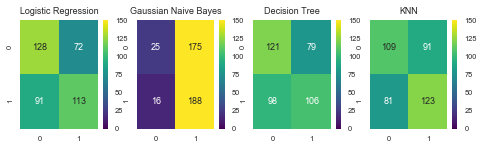

In [93]:
#1. Logistic Regression
f, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize = (8,2))
LogCM = confusion_matrix(y_test, log_y_pred)
sns.heatmap(LogCM, annot = True, fmt = 'd', vmin = 0, vmax = 150, cmap = 'viridis', ax = ax1)
ax1.set_title('Logistic Regression')


#2. Gaussien Naive Bayes
NBCM = confusion_matrix(y_test,NB_y_pred)
sns.heatmap(NBCM, annot = True, fmt = 'd', vmin = 0, vmax = 150, cmap = 'viridis', ax = ax2)
ax2.set_title('Gaussian Naive Bayes')

#3. Decision Tree Classifier
DTCM = confusion_matrix(y_test,DT_y_pred)
sns.heatmap(DTCM,annot = True, fmt = 'd', vmin = 0 ,vmax = 150, cmap = 'viridis', ax = ax3)
ax3.set_title('Decision Tree')

#4. KNN
KNNCM = confusion_matrix(y_test, KNN_y_pred)
sns.heatmap(KNNCM, annot = True, fmt = 'd', vmin = 0, vmax = 150, cmap = 'viridis', ax = ax4)
ax4.set_title('KNN')


plt.show()

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test,log_y_pred))

             precision    recall  f1-score   support

          0       0.58      0.64      0.61       200
          1       0.61      0.55      0.58       204

avg / total       0.60      0.60      0.60       404

